In [1]:
%matplotlib inline
from sklearn import linear_model
import scipy.stats
import os
import shutil
import re
import numpy as np
import pandas as pd
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
from Bio import SeqIO
from src import contig_stats
sns.set_style("whitegrid")

In [2]:
path = "/media/NGS/Sequences/Vibrio_cholerae/NCBI"

In [3]:
def run(args):
    fasta, file = args
    id = re.sub(r".fa$", "", file)
    n25, n50, n75, m, c = contig_stats.stats(list(SeqIO.parse(fasta, "fasta")))
    return id, n25, n50, n75, m, c

In [4]:
args = ((os.path.join(path, file), file) for file in os.listdir(path))
data = list(ProcessPoolExecutor(25).map(run, args))

In [5]:
table = pd.DataFrame(data, columns=["id", "N25", "N50", "N75", "total_length", "counts"])
table

,id,N25,N50,N75,total_length,counts
0,GCA_000788675.1.fna,259608,191868,98340,3966360,97
1,GCA_000474965.1.fna,1056623,737755,178465,3959428,17
2,GCA_001637555.1.fna,236719,133606,75713,3957801,153
3,GCA_000960915.1.fna,392670,235384,130478,4040011,120
4,GCA_000220785.2.fna,1057492,697358,282415,4179415,18
5,GCA_003056975.1.fna,401130,198794,108329,3970206,123
6,GCA_002098845.1.fna,246625,198190,134238,4162346,112
7,GCA_000166475.2.fna,338347,155212,94075,4016678,93
8,GCA_002808205.1.fna,320373,178407,107432,4044346,82
9,GCA_001857285.1.fna,592649,249947,181393,3938077,104


# N25, N50, N75

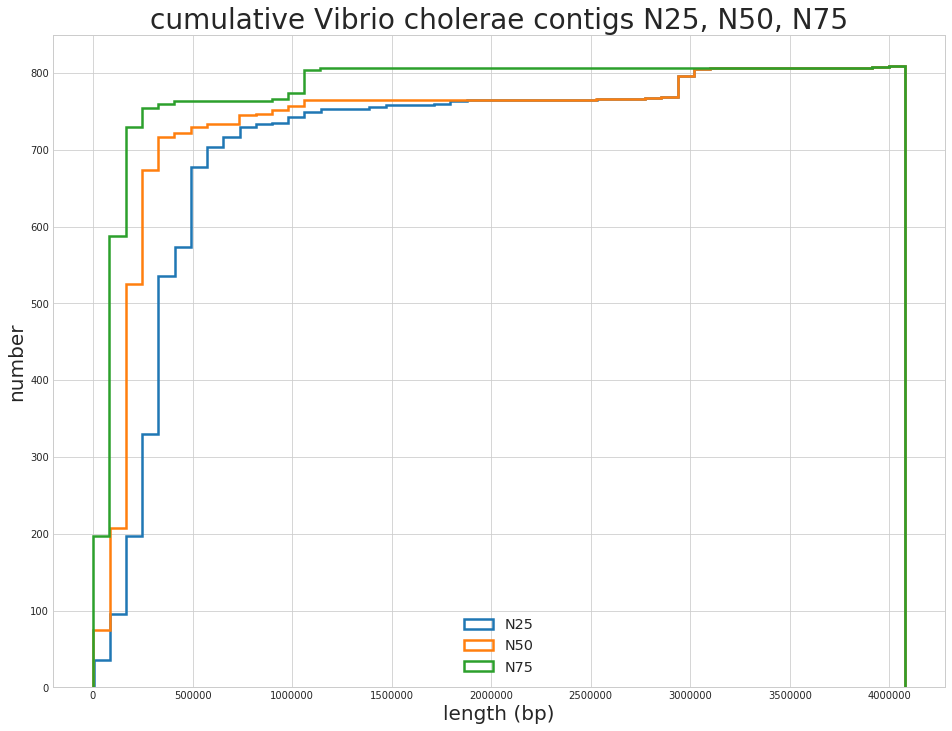

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["N25"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N25")
ax.hist(table["N50"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.hist(table["N75"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N75")
ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.xlabel("length (bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("cumulative Vibrio cholerae contigs N25, N50, N75", fontsize=28)
plt.savefig("pics/cumulative Vibrio cholerae contigs quality.png")

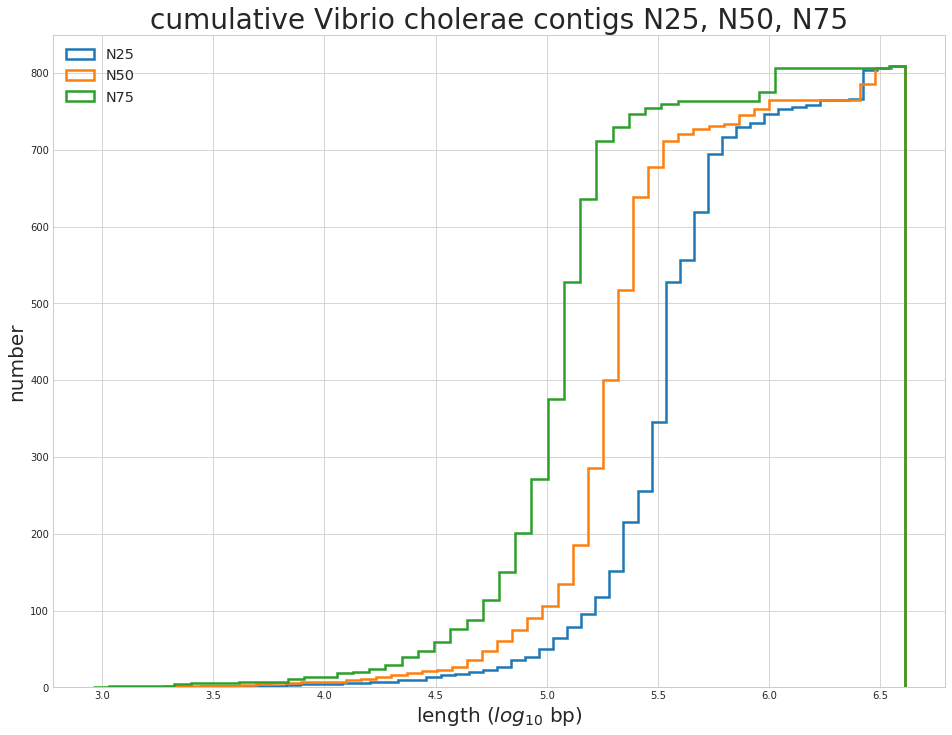

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(np.log10(table["N25"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N25")
ax.hist(np.log10(table["N50"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.hist(np.log10(table["N75"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N75")
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel("length ($log_{10}$ bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("cumulative Vibrio cholerae contigs N25, N50, N75", fontsize=28)
plt.savefig("pics/cumulative Vibrio cholerae contigs quality log-scale.png")

# Counts

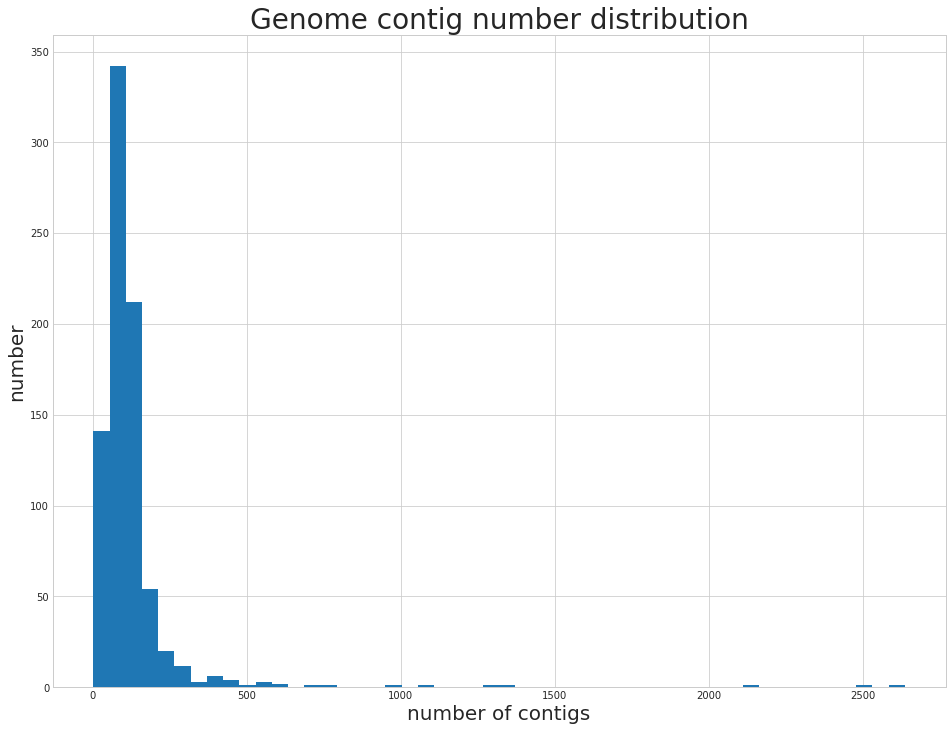

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution", fontsize=28)
plt.savefig("pics/Vibrio cholerae genome contig number distribution.png")

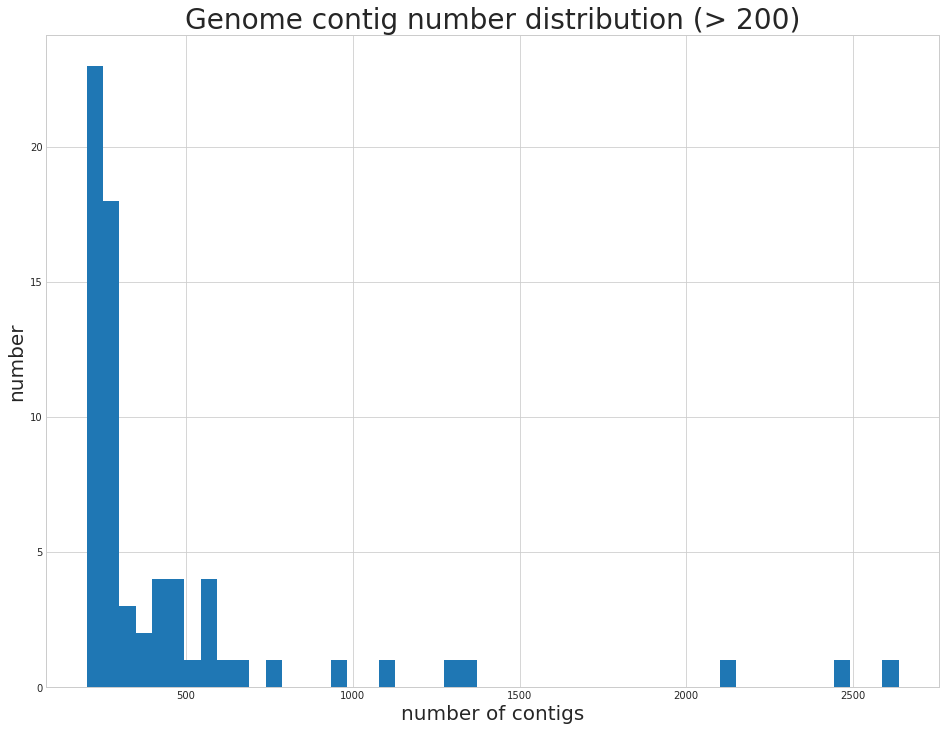

In [9]:
plt.figure(figsize=(16, 12))
plt.hist(table[table["counts"] > 200]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (> 200)", fontsize=28)
plt.savefig("pics/Vibrio cholerae genome contig number distribution larger 200.png")

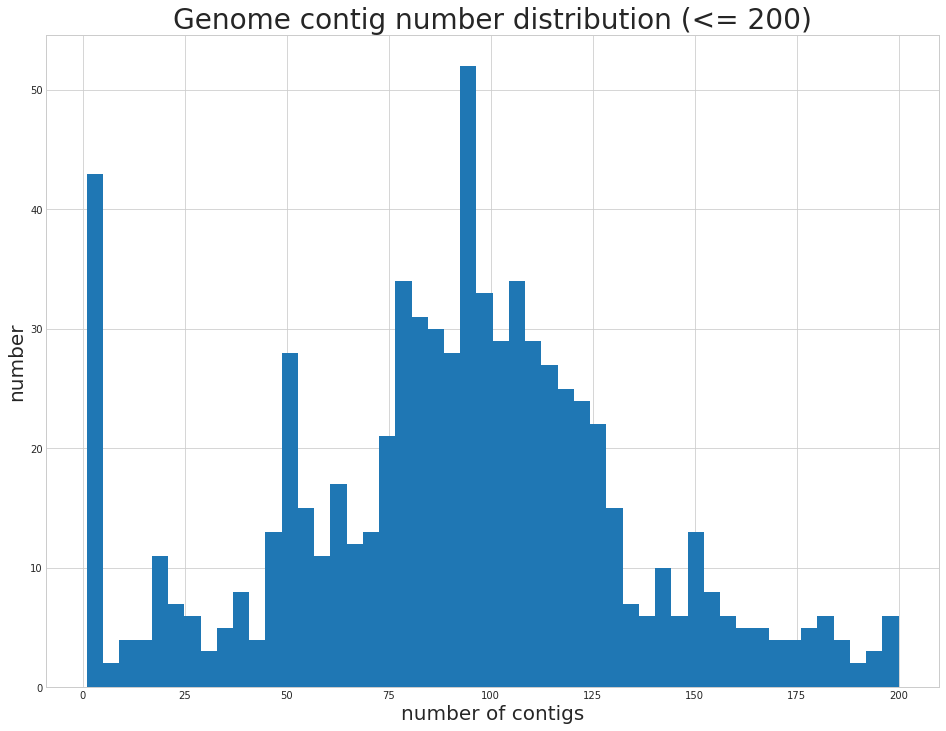

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table[table["counts"] <= 200]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (<= 200)", fontsize=28)
plt.savefig("pics/Vibrio cholerae genome contig number distribution lower 200.png")

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


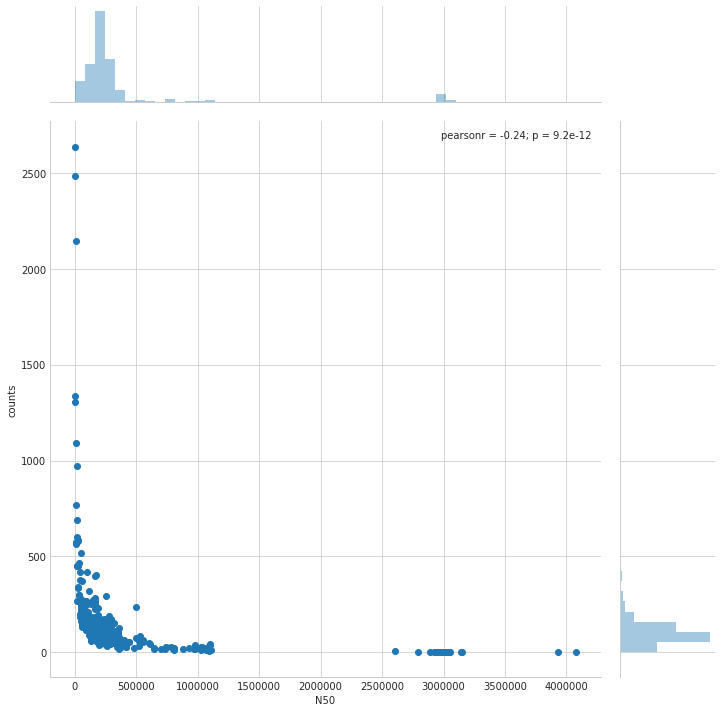

In [11]:
sns.jointplot(data=table, x="N50", y="counts", size=10)
# plt.savefig("pics/Salmonella enterica N50-count plot.png")

In [12]:
table["1/N50"] = 1/table["N50"]
table["1000/N50"] = table["1/N50"]*1000

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


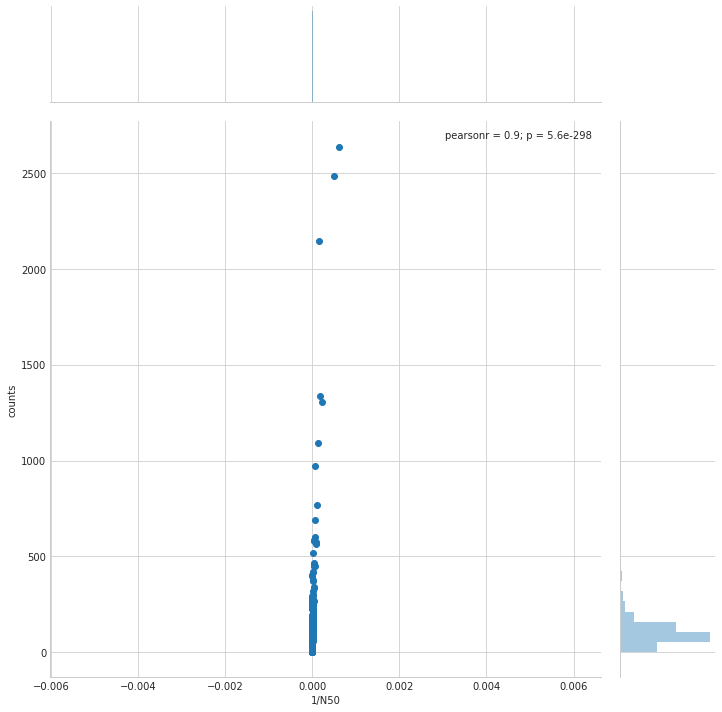

In [13]:
sns.jointplot(data=table, x="1/N50", y="counts", size=10)

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


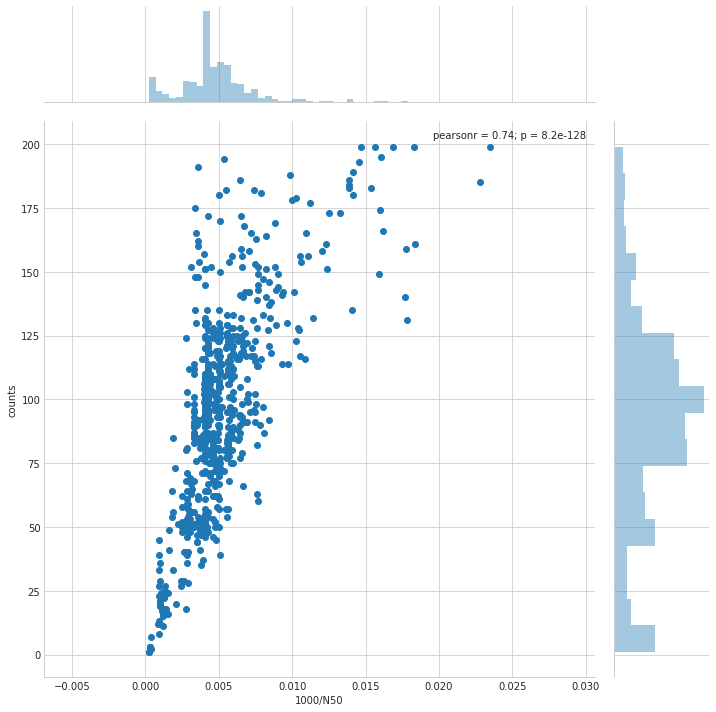

In [14]:
sns.jointplot(data=table[table["counts"] < 200], x="1000/N50", y="counts", size=10)

# comparison with serotypes

In [15]:
curated = table[(table["counts"] <= 200) & (table["N50"] >= 10 ** 5)]

In [16]:
curated.shape

(699, 8)

# rule out plasmid only and contaminated

In [17]:
curated.index = [x[0:15] for x in curated["id"]]

# Combine metadata selection

In [18]:
metafile = "/media/NGS/Sequences/Vibrio_cholerae/Vibrio_cholerae.csv"
meta = pd.read_csv(metafile)
meta["Assembly"] = [x.strip() for x in meta["Assembly"]]
meta = meta[meta["GC%"] != "-"]
meta["GC%"] = list(map(lambda x: float(x), meta["GC%"]))
meta

,#Organism/Name,Strain,CladeID,BioSample,BioProject,Group,SubGroup,Assembly,Size (Mb),GC%,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Level,RefSeq FTP,GenBank FTP
0,Vibrio cholerae O1 biovar El Tor str. N16961,N16961,19639,SAMN02603969,PRJNA36,Proteobacteria,Gammaproteobacteria,GCA_000006745.1,4.03346,47.4873,chromosome I:NC_002505.1/AE003852.1; chromosom...,-,2,3693,3504,2000/06/14,2016/08/03,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
1,Vibrio cholerae O395,O395,19639,SAMN02604040,PRJNA15667,Proteobacteria,Gammaproteobacteria,GCA_000016245.1,4.13232,47.5586,chromosome 1:NC_009456.1/CP000626.1; chromosom...,-,2,4021,3800,2007/05/08,2015/08/12,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
2,Vibrio cholerae M66-2,M66-2,19639,SAMN02603897,PRJNA32851,Proteobacteria,Gammaproteobacteria,GCA_000021605.1,3.93891,47.5875,chromosome I:NC_012578.1/CP001233.1; chromosom...,-,2,3754,3549,2009/04/20,2015/08/12,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
3,Vibrio cholerae O395,O395,19639,SAMN02603898,PRJNA32853,Proteobacteria,Gammaproteobacteria,GCA_000021625.1,4.13530,47.5582,chromosome I:NC_012582.1/CP001235.1; chromosom...,-,2,4029,3808,2009/04/20,2015/07/30,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
4,Vibrio cholerae MJ-1236,MJ-1236,19639,SAMN02603569,PRJNA33555,Proteobacteria,Gammaproteobacteria,GCA_000022585.1,4.23637,47.2948,chromosome 1:NC_012668.1/CP001485.1; chromosom...,-,2,4049,3858,2009/05/04,2015/08/12,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
5,Vibrio cholerae O1 str. 2010EL-1786,2010EL-1786,19639,SAMN00765529,PRJNA59943,Proteobacteria,Gammaproteobacteria,GCA_000166455.2,4.07774,47.5204,chromosome 1:NC_016445.1/CP003069.1; chromosom...,-,2,3872,3705,2011/11/10,2017/03/22,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
6,Vibrio cholerae LMA3984-4,LMA3984-4,19639,SAMN02603740,PRJNA61113,Proteobacteria,Gammaproteobacteria,GCA_000195065.1,3.73872,47.9734,chromosome I:NC_017270.1/CP002555.1; chromosom...,-,2,3529,3106,2011/04/05,2017/03/22,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
7,Vibrio cholerae IEC224,IEC224,19639,SAMN02603415,PRJNA81153,Proteobacteria,Gammaproteobacteria,GCA_000250855.1,4.07959,47.4898,chromosome I:NC_016944.1/CP003330.1; chromosom...,-,2,3915,3722,2012/02/29,2017/03/23,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
8,Vibrio cholerae,2012EL-2176,19639,SAMN02741837,PRJNA245985,Proteobacteria,Gammaproteobacteria,GCA_000765415.1,4.25802,47.7124,chromosome 1:NZ_CP007634.1/CP007634.1; chromos...,-,3,4108,3907,2014/10/10,2017/03/24,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
9,Vibrio cholerae,2012Env-9,19639,SAMN03104885,PRJNA263670,Proteobacteria,Gammaproteobacteria,GCA_000788715.2,4.06181,47.6062,chromosome 1:NZ_CP012997.1/CP012997.1; chromos...,-,2,3907,3646,2016/10/26,2017/03/28,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...


In [19]:
curated = pd.merge(curated, meta, left_index=True, right_on="Assembly")

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


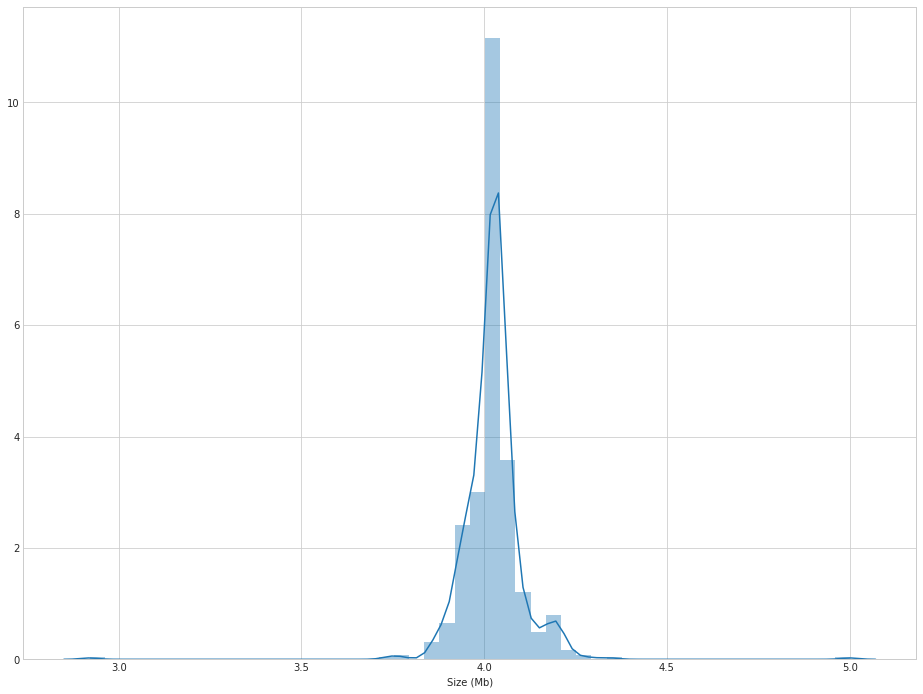

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sns.distplot(curated["Size (Mb)"], ax=ax)
fig.savefig("pics/Vibrio cholerae genome size distribution.png")

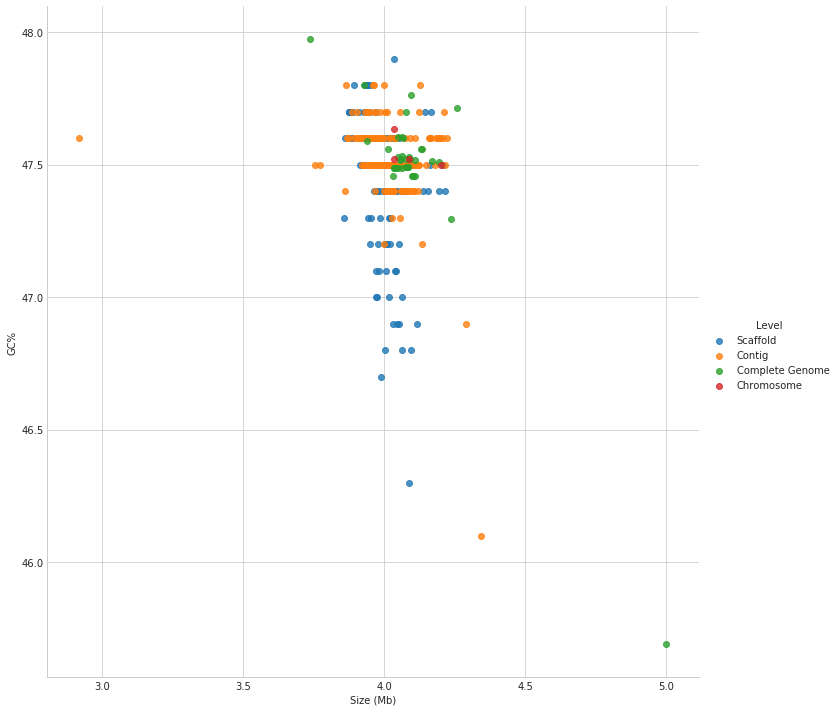

In [21]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", hue="Level", fit_reg=False, size=10)
plt.savefig("pics/Vibrio cholerae genome size-GC content plot.png")

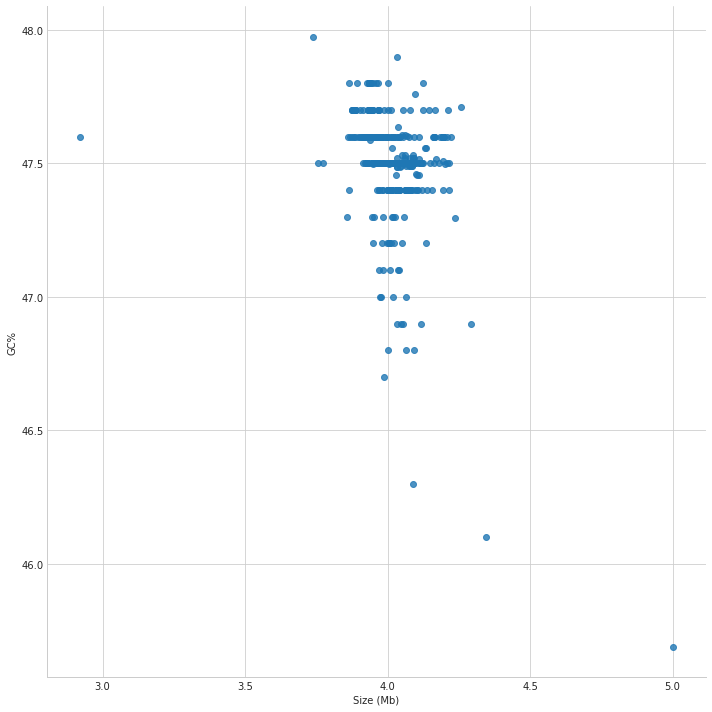

In [22]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", fit_reg=False, size=10)
plt.savefig("pics/Vibrio cholerae genome size-GC content plot.png")

In [24]:
model = linear_model.HuberRegressor(epsilon=3)
model.fit(curated[["Size (Mb)"]].as_matrix(), list(curated["GC%"]))

HuberRegressor(alpha=0.0001, epsilon=3, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [25]:
curated["y_mean"] = model.predict(curated[["Size (Mb)"]])
curated["corrected_y"] = curated["GC%"] - curated["y_mean"]
curated["outliers"] = model.outliers_

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


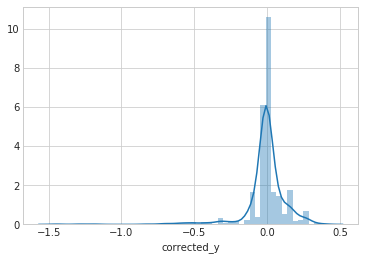

In [26]:
sns.distplot(curated["corrected_y"])

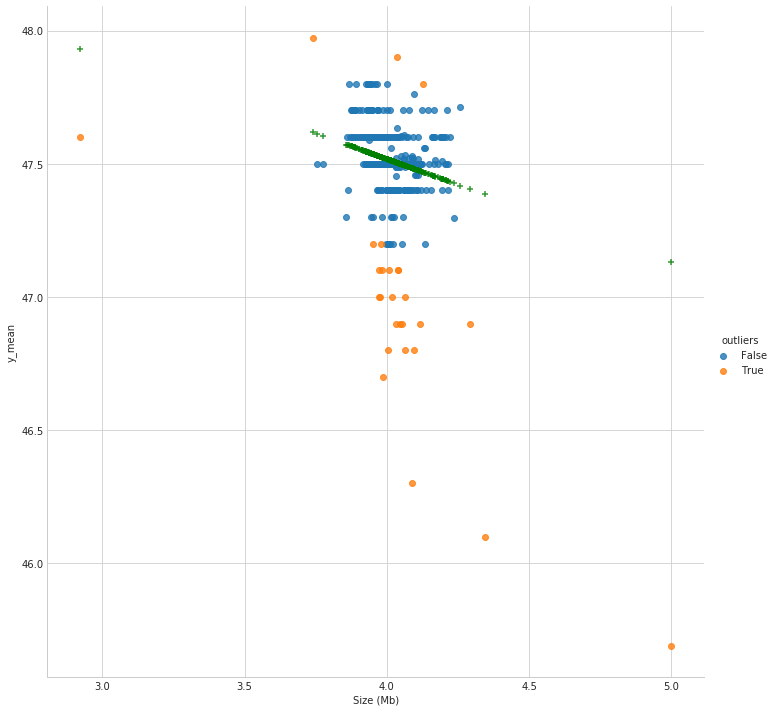

In [28]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", hue="outliers", fit_reg=False, size=10)
sns.regplot(x="Size (Mb)", y="y_mean", data=curated, color="g", marker="+", fit_reg=False)
plt.savefig("pics/Vibrio cholerae genome size-GC content plot outliers.png")

In [29]:
curated = curated[~curated['outliers']]

In [30]:
curated.to_csv("results/Vibrio_cholerae_data_clean.tsv", sep="\t", index=False)

# selection of clean dataset

In [31]:
dst = "/media/NGS/Sequences/Vibrio_cholerae/NCBI_clean"
for file in curated["id"]:
    shutil.copyfile(os.path.join(path, file), os.path.join(dst, file))